#<b>Intro</b>

Dataset: https://www.kaggle.com/datasets/kandhalkhandeka/satellites-and-debris-in-earths-orbit

###<u>The problem of space debris</u>

![Sizes of Debris](https://i.pinimg.com/originals/50/2a/92/502a92f64945244e2a67a052f147573f.jpg)

###<u>Read and clean data</u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 144
import seaborn as sns
from matplotlib import ticker

In [2]:
df = pd.read_csv('space_debris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 

In [3]:
df['RCS_SIZE'].unique()

array(['MEDIUM', 'SMALL', 'LARGE', nan], dtype=object)

In [4]:
df['OBJECT_TYPE'].unique()

array(['DEBRIS', 'PAYLOAD', 'ROCKET BODY', 'TBA'], dtype=object)

In [5]:
df['COUNTRY_CODE'].unique()

array(['FR', 'CIS', 'IND', 'PRC', 'US', 'SEAL', 'ITSO', 'SES', 'NICO',
       'ESA', 'JPN', 'EUTE', 'GER', 'PAKI', 'EUME', 'SPN', 'ALG', 'AUS',
       'ARGN', 'SAUD', 'IT', 'CA', 'AC', 'GLOB', 'GREC', 'UAE', 'DEN',
       'NIG', 'UK', 'TURK', 'SKOR', 'CHBZ', 'ISRA', 'USBZ', 'ROC', 'IM',
       'THAI', 'IRAN', 'INDO', 'KAZ', 'AB', 'MALA', 'EGYP', 'COL', 'BRAZ',
       'RASC', 'NOR', 'VTNM', 'NETH', 'ORB', 'VENZ', 'SAFR', 'SWTZ',
       'SWED', 'UKR', 'SING', 'STCT', 'MEX', 'LUXE', 'CHLE', 'BELA',
       'NKOR', 'AZER', 'ASRA', 'ECU', 'EST', 'O3B', 'QAT', 'POL', 'PER',
       'BOL', 'FRIT', 'BEL', 'URY', 'IRAQ', 'TMMC', 'LAOS', 'BERM', 'LTU',
       'FIN', 'CZCH', 'BGR', 'TBD', 'MA', 'AGO', 'BGD', 'RP', 'JOR',
       'ISS', 'SDN', 'RWA', 'SVN', 'NZ', 'PRY', 'TUN', 'HUN', 'MMR',
       'MUS', 'KWT', nan], dtype=object)

In [6]:
na_counts=df.isna().sum()
na_counts

CCSDS_OMM_VERS             0
COMMENT                    0
CREATION_DATE              0
ORIGINATOR                 0
OBJECT_NAME                0
OBJECT_ID                 39
CENTER_NAME                0
REF_FRAME                  0
TIME_SYSTEM                0
MEAN_ELEMENT_THEORY        0
EPOCH                      0
MEAN_MOTION                0
ECCENTRICITY               0
INCLINATION                0
RA_OF_ASC_NODE             0
ARG_OF_PERICENTER          0
MEAN_ANOMALY               0
EPHEMERIS_TYPE             0
CLASSIFICATION_TYPE        0
NORAD_CAT_ID               0
ELEMENT_SET_NO             0
REV_AT_EPOCH               0
BSTAR                      0
MEAN_MOTION_DOT            0
MEAN_MOTION_DDOT           0
SEMIMAJOR_AXIS             0
PERIOD                     0
APOAPSIS                   0
PERIAPSIS                  0
OBJECT_TYPE                0
RCS_SIZE                 198
COUNTRY_CODE              39
LAUNCH_DATE               39
SITE                      39
DECAY_DATE    

In [7]:
df = df.drop(labels=['DECAY_DATE'], axis=1) # always null

In [8]:
df['OBJECT_TYPE'] = df['OBJECT_TYPE'].replace(to_replace={'DEBRIS':'Debris','PAYLOAD':'Payload','TBA': 'Unknown','ROCKET BODY': 'Rocket'}) # Relabel object types
df['OBJECT_TYPE'].unique()

array(['Debris', 'Payload', 'Rocket', 'Unknown'], dtype=object)

In [9]:
df['COUNTRY_CODE'] = df['COUNTRY_CODE'].replace(to_replace={'TBD':'Unknown',np.nan:'Unknown'}) # Relabel unknown country code
df['COUNTRY_CODE'].unique()

array(['FR', 'CIS', 'IND', 'PRC', 'US', 'SEAL', 'ITSO', 'SES', 'NICO',
       'ESA', 'JPN', 'EUTE', 'GER', 'PAKI', 'EUME', 'SPN', 'ALG', 'AUS',
       'ARGN', 'SAUD', 'IT', 'CA', 'AC', 'GLOB', 'GREC', 'UAE', 'DEN',
       'NIG', 'UK', 'TURK', 'SKOR', 'CHBZ', 'ISRA', 'USBZ', 'ROC', 'IM',
       'THAI', 'IRAN', 'INDO', 'KAZ', 'AB', 'MALA', 'EGYP', 'COL', 'BRAZ',
       'RASC', 'NOR', 'VTNM', 'NETH', 'ORB', 'VENZ', 'SAFR', 'SWTZ',
       'SWED', 'UKR', 'SING', 'STCT', 'MEX', 'LUXE', 'CHLE', 'BELA',
       'NKOR', 'AZER', 'ASRA', 'ECU', 'EST', 'O3B', 'QAT', 'POL', 'PER',
       'BOL', 'FRIT', 'BEL', 'URY', 'IRAQ', 'TMMC', 'LAOS', 'BERM', 'LTU',
       'FIN', 'CZCH', 'BGR', 'Unknown', 'MA', 'AGO', 'BGD', 'RP', 'JOR',
       'ISS', 'SDN', 'RWA', 'SVN', 'NZ', 'PRY', 'TUN', 'HUN', 'MMR',
       'MUS', 'KWT'], dtype=object)

In [10]:
df['RCS_SIZE'] = df['RCS_SIZE'].replace(to_replace={'LARGE':'Large','MEDIUM':'Medium',"SMALL":"Small"}) # Relabel object sizes
df['RCS_SIZE'].unique()

array(['Medium', 'Small', 'Large', nan], dtype=object)

In [11]:
df['PERIOD_HOURS'] = df['PERIOD'] / 60 # Create new period column measured in hours

In [12]:
df['ALTITUDE_MI'] = (df['SEMIMAJOR_AXIS'] - 6371) * 0.6213 # Create new column with altitude above Earth surface (Earth radius = 6371km)

###<u>Description of dataset</u>

This dataset contains roughly 14,000 objects, classified as `DEBRIS`, `PAYLOAD`, `ROCKET` or unknown,</br>and either `LARGE`, `MEDIUM`, `SMALL` or unknown.
</br></br>
According to Google\'s AI, space debris range from:</br>"Larger than 1 mm: 100 million \- 170 million objects</br>Larger than 1 cm: 670,000 objects</br>Larger than 10 cm: 25,000 \- 29,000 objects"</br></br>
<b>So we know this dataset does not contain all debris objects.</b></br>
</br>
We will investigate the object size and type columns, the orbital parameters, the country of origin and launch date, among other columns.</br></br>

In this dataset, we only know if an object is `LARGE`,`MEDIUM` and `SMALL`, so we will stick to [a NASA convention](https://orbitaldebris.jsc.nasa.gov/quarterly-news/pdfs/ODQNv28i2.pdf) and say:</br>`LARGE`: 7cm and over</br>`MEDIUM`: 3mm-7cm</br>`SMALL`: 3mm and under.</br></br>
Note: This dataset does not contain any mass estimates.</br></br>
Note: According to NASA, the total mass of all space debris taken together exceeds 9,000 metric tons as of 2022. [Source](https://orbitaldebris.jsc.nasa.gov/faq/#:~:text=Return%20to%20Top-,3.,Earth%20exceeded%209%2C000%20metric%20tons.)


#<b>Descriptive questions</b>

###<u>What time range does the dataset cover?</u>

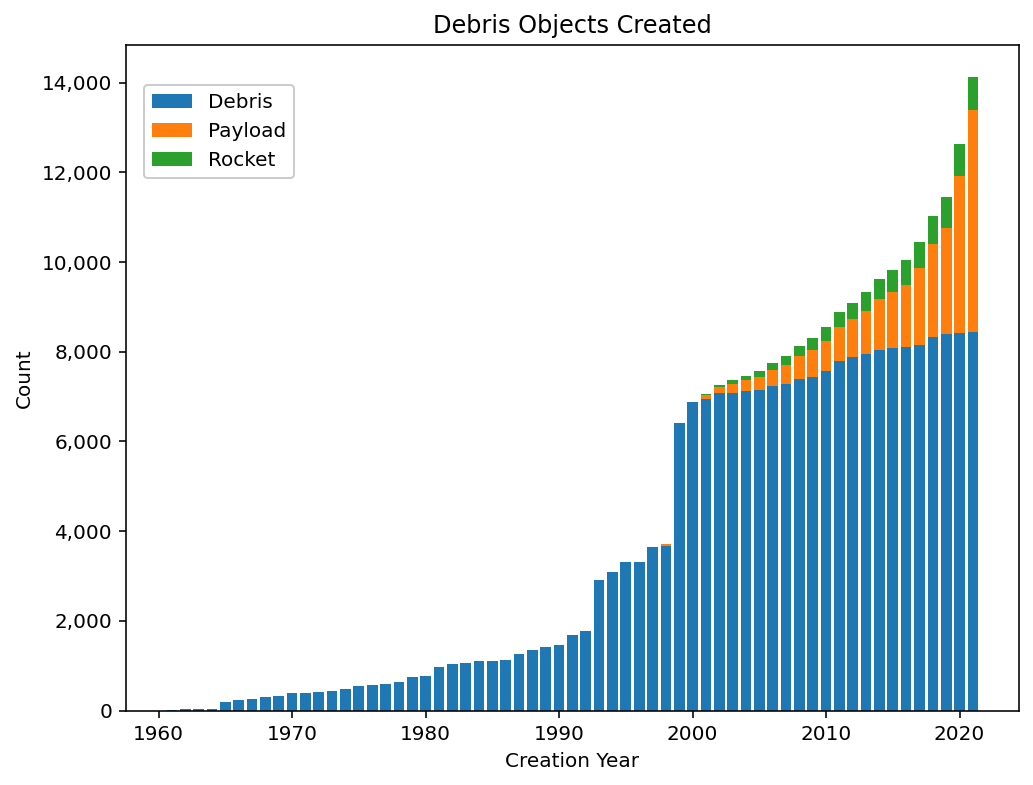

In [13]:
df['AggValue'] = 1
has_launch_date_df = df.dropna(subset='LAUNCH_DATE')
has_launch_date_year_counts = has_launch_date_df.pivot_table(values='AggValue', index='LAUNCH_DATE', columns='OBJECT_TYPE', aggfunc=np.sum).cumsum()

fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Debris'])
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Payload'], bottom=has_launch_date_year_counts['Debris'])
plt.bar(x=has_launch_date_year_counts.index, height=has_launch_date_year_counts['Rocket'], bottom=(has_launch_date_year_counts['Payload']+has_launch_date_year_counts['Debris']))
plt.legend(['Debris','Payload','Rocket'], framealpha=1, loc=(0.02,0.8))
plt.xlabel('Creation Year')
plt.ylabel('Count')
plt.title('Debris Objects Created')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
plt.show()

###<u>How much of each size and type of space debris is there?</u>

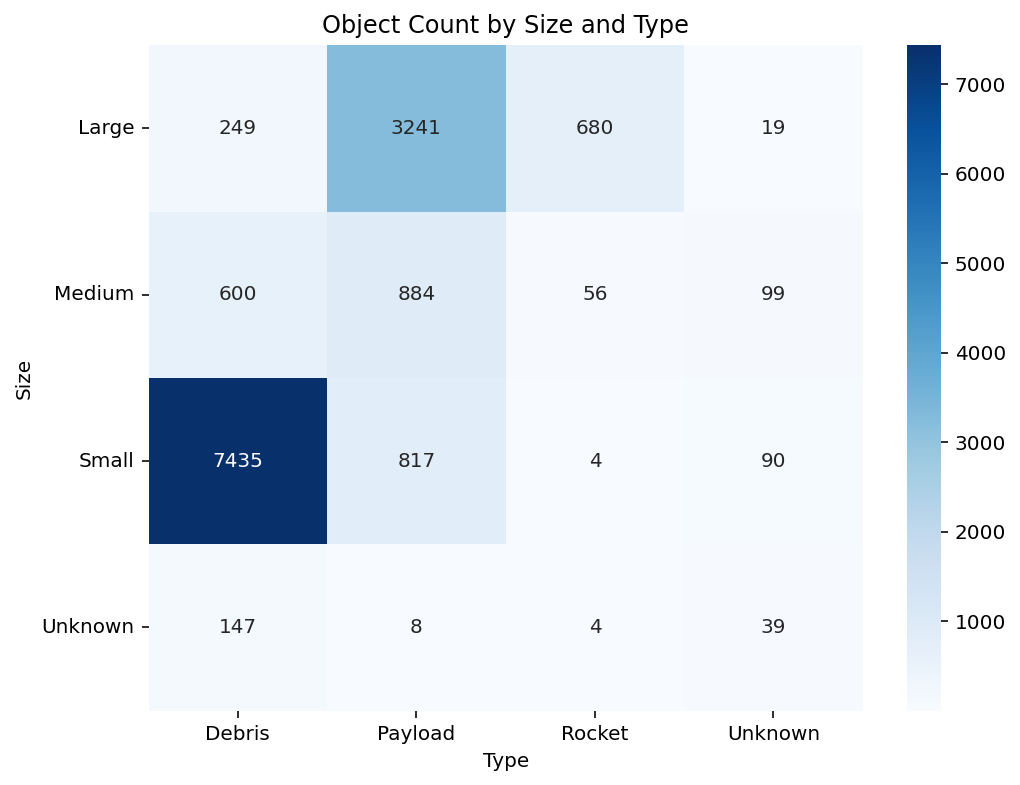

In [14]:
df_filled = df.copy()
df_filled.loc[:,'RCS_SIZE'] = df_filled['RCS_SIZE'].fillna('Unknown')
class_counts = df_filled.pivot_table(values='AggValue', index='RCS_SIZE', columns='OBJECT_TYPE', aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(class_counts, cmap="Blues", annot=True, fmt='g')
plt.ylabel('Size')
plt.xlabel('Type')
plt.title("Object Count by Size and Type")
plt.yticks(rotation=0)
plt.show()

###<u>In what orbits are the debris mainly located?</u>

In [15]:
debris_elements_df = df[['ECCENTRICITY','INCLINATION', 'RA_OF_ASC_NODE','ARG_OF_PERICENTER', 'MEAN_ANOMALY','SEMIMAJOR_AXIS', 'PERIOD_HOURS', 'APOAPSIS', 'PERIAPSIS']]
debris_elements_df.describe()

,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,SEMIMAJOR_AXIS,PERIOD_HOURS,APOAPSIS,PERIAPSIS
count,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000,14372.000000
mean,0.067168,74.354208,182.353111,165.977199,191.015595,10636.185210,3.725359,5721.060178,2795.040245
std,0.181547,29.626780,116.717713,104.461866,109.873807,9580.627227,7.441951,13016.299008,7943.045264
min,0.000005,0.001400,0.020000,0.008200,0.004800,6542.850000,1.463050,183.393000,73.279000
25%,0.000725,53.055300,71.987350,77.363475,90.001600,6956.246750,1.603879,599.876000,546.115000
50%,0.003416,86.369200,189.460250,150.483900,206.957400,7177.549000,1.681017,843.686000,702.433500
75%,0.013505,98.565125,292.484750,258.328550,284.163200,7468.055000,1.784100,1207.919500,831.959750
max,0.897218,144.586200,359.967900,359.989900,359.981900,304049.635000,463.473817,372136.402000,224547.015000


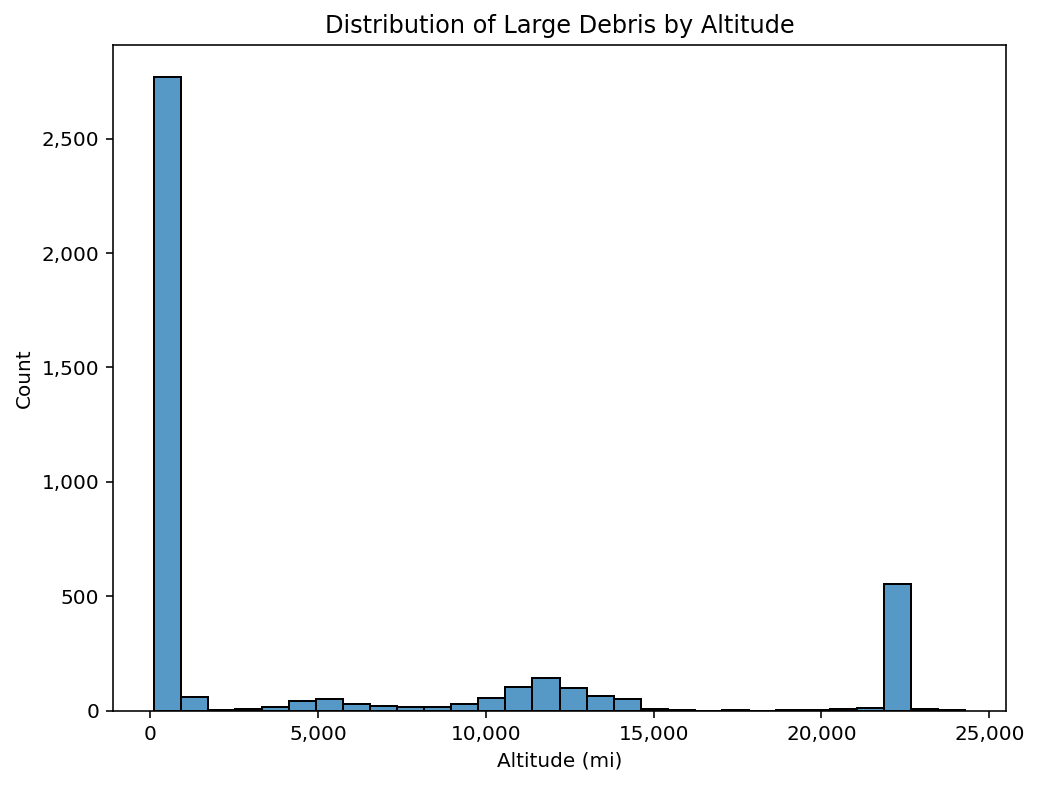

In [16]:
# Plot count vs altitude histogram
PERIOD_NO_OUTLIERS_LARGE_MASK = ((df['PERIOD_HOURS'] < 27) & (df['RCS_SIZE'] == 'Large'))
period_no_outliers_large_df = df[PERIOD_NO_OUTLIERS_LARGE_MASK]

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=period_no_outliers_large_df, x="ALTITUDE_MI",bins=30)
plt.xlabel('Altitude (mi)')
plt.title('Distribution of Large Debris by Altitude')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

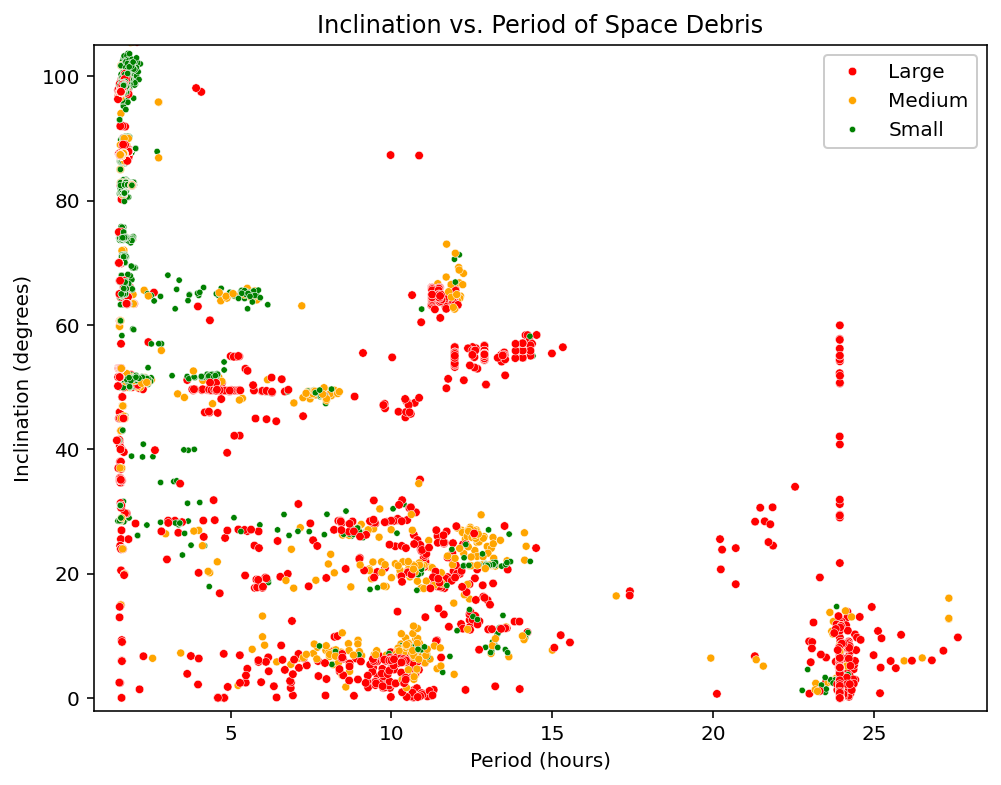

In [17]:
sizes = ['Large', 'Medium', 'Small']
sizes_palette = {'Small': 'green', 'Medium':'orange', 'Large': 'red'}

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=df['PERIOD_HOURS'], y=df['INCLINATION'],s=10, size=df['RCS_SIZE'], size_order=sizes, sizes=[18,16,10], hue=df['RCS_SIZE'], palette=sizes_palette, hue_order=sizes)
plt.xlabel('Period (hours)')
plt.ylabel('Inclination (degrees)')
plt.title('Inclination vs. Period of Space Debris')
plt.xlim((0.75,28.5))
plt.ylim((-2,105))
plt.legend(framealpha=1)
plt.show()

Notice the vertical bands at roughly T= 1.5h and T = 24h. This corresponds to the lowest-earth orbits and geosynchronous orbit respectively.

<u>QUESTION: Do the horizontal clusters around 5°, 25° and 50° correspond to certain countries' or regions' latitudes, i.e. where specific countries have placed their own satellites?</u>

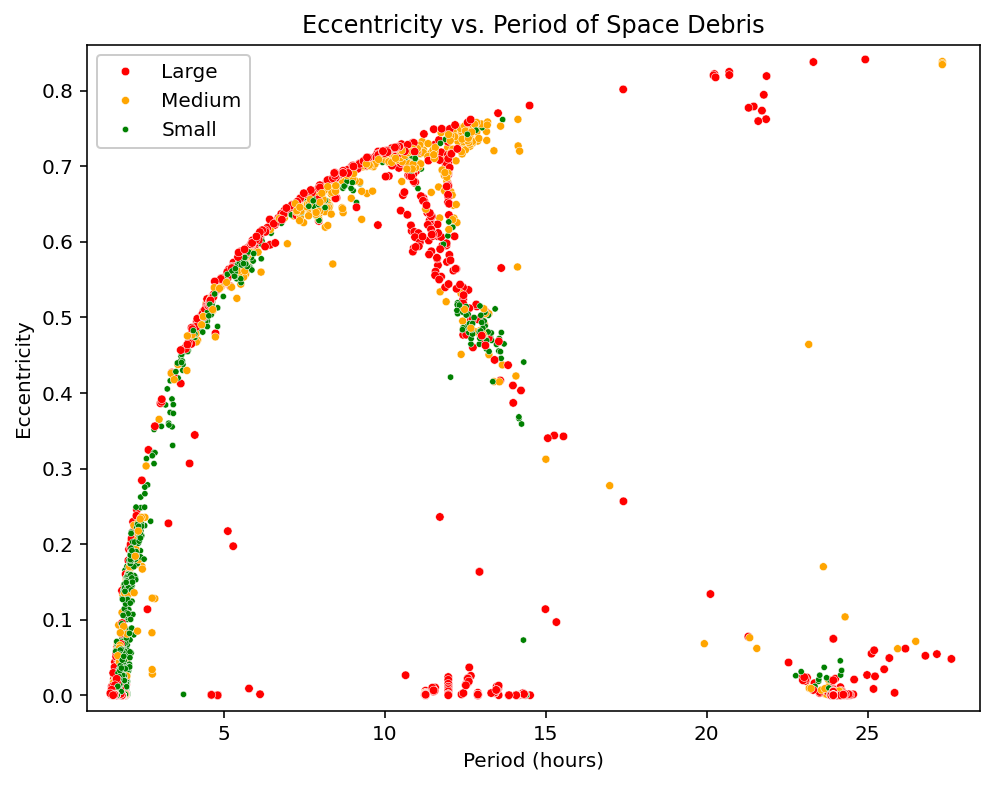

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=df['PERIOD_HOURS'], y=df['ECCENTRICITY'],s=10, size=df['RCS_SIZE'], size_order=sizes, sizes=[18,16,10], hue=df['RCS_SIZE'], palette=sizes_palette, hue_order=sizes)
plt.xlabel('Period (hours)')
plt.ylabel('Eccentricity')
plt.title('Eccentricity vs. Period of Space Debris')
plt.xlim((0.75,28.5))
plt.ylim((-0.02,0.86))
plt.legend(framealpha=1)
plt.show()

* <u>QUESTION: What causes that curved boundary above and what is the function describing it?</u>


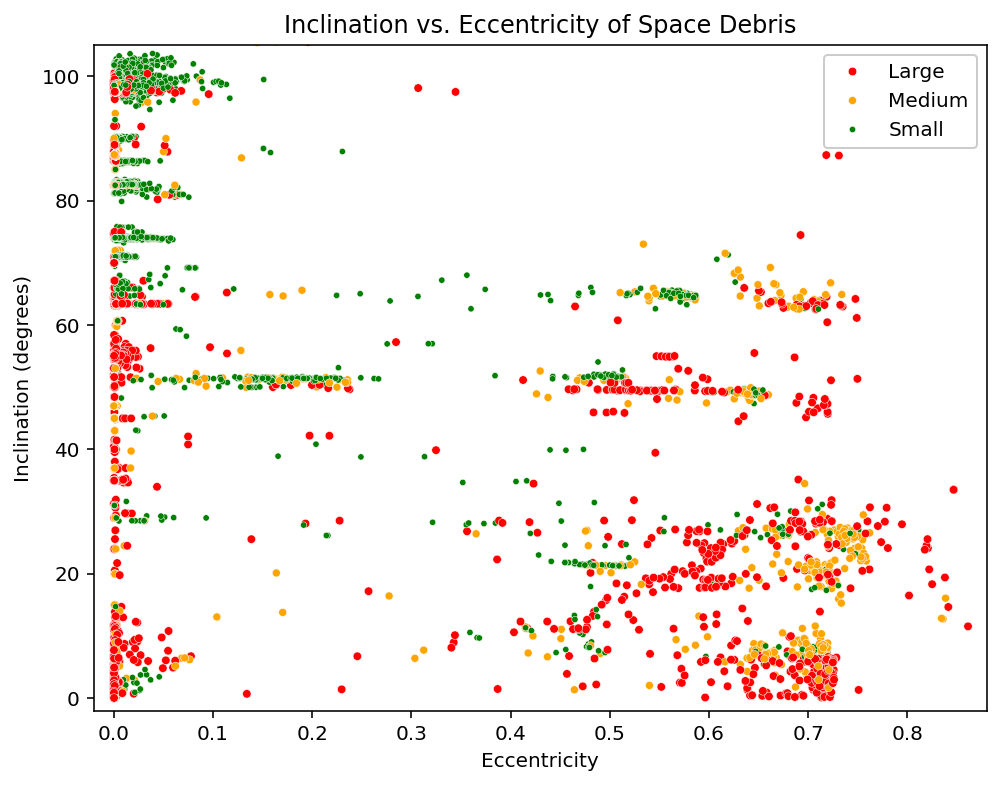

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=df['ECCENTRICITY'], y=df['INCLINATION'],s=10, size=df['RCS_SIZE'], size_order=sizes, sizes=[18,16,10], hue=df['RCS_SIZE'], palette=sizes_palette, hue_order=sizes)
plt.xlabel('Eccentricity')
plt.ylabel('Inclination (degrees)')
plt.title('Inclination vs. Eccentricity of Space Debris')
plt.xlim((-0.02,0.88))
plt.ylim((-2,105))
plt.legend(framealpha=1)
plt.show()

###<u>Which countries are responsible for the most debris?</u>

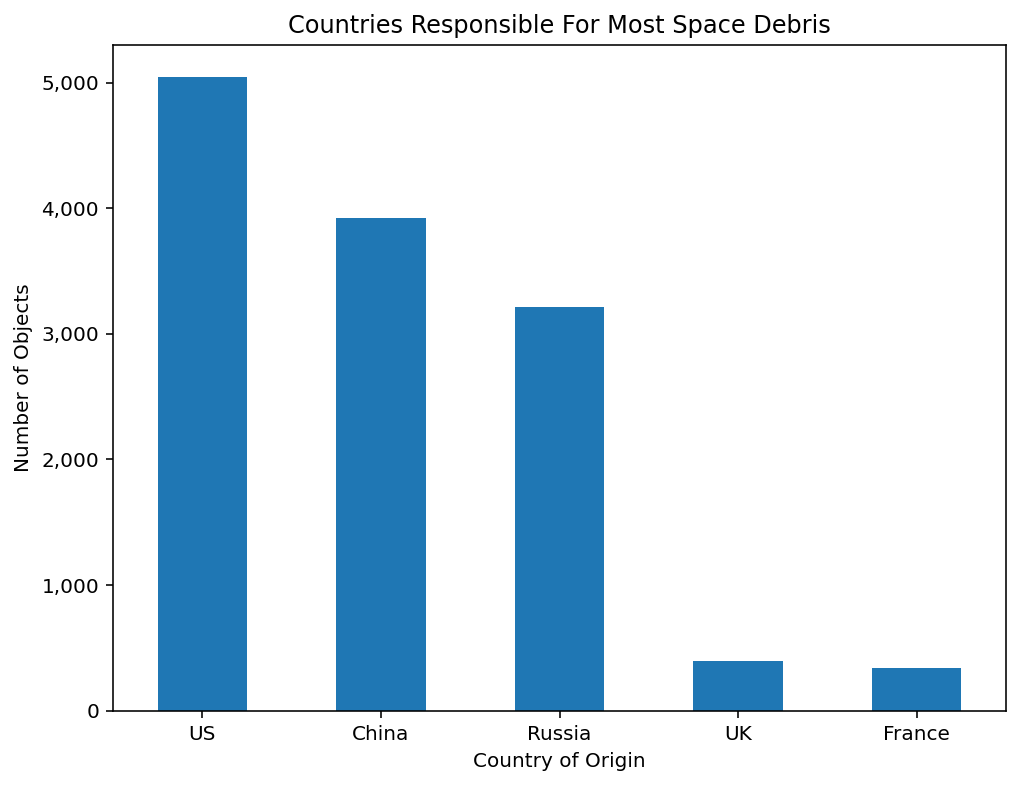

In [20]:
# Bar chart count by country
top_counts = df['COUNTRY_CODE'].value_counts()[:5]

fig, ax = plt.subplots(figsize=(8, 6))
top_counts.plot(kind='bar')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Objects')
plt.title('Countries Responsible For Most Space Debris')
plt.xticks(ticks=[0,1,2,3,4], labels=["US",'China','Russia','UK','France'],rotation=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [21]:
responsibility = top_counts / len(df)
print(f'The US is responsible for {int(100 * responsibility[0])}% of space debris.')

The US is responsible for 35% of space debris.


###<u>How many small, medium and large objects are there from the top 3 contributors?</u>

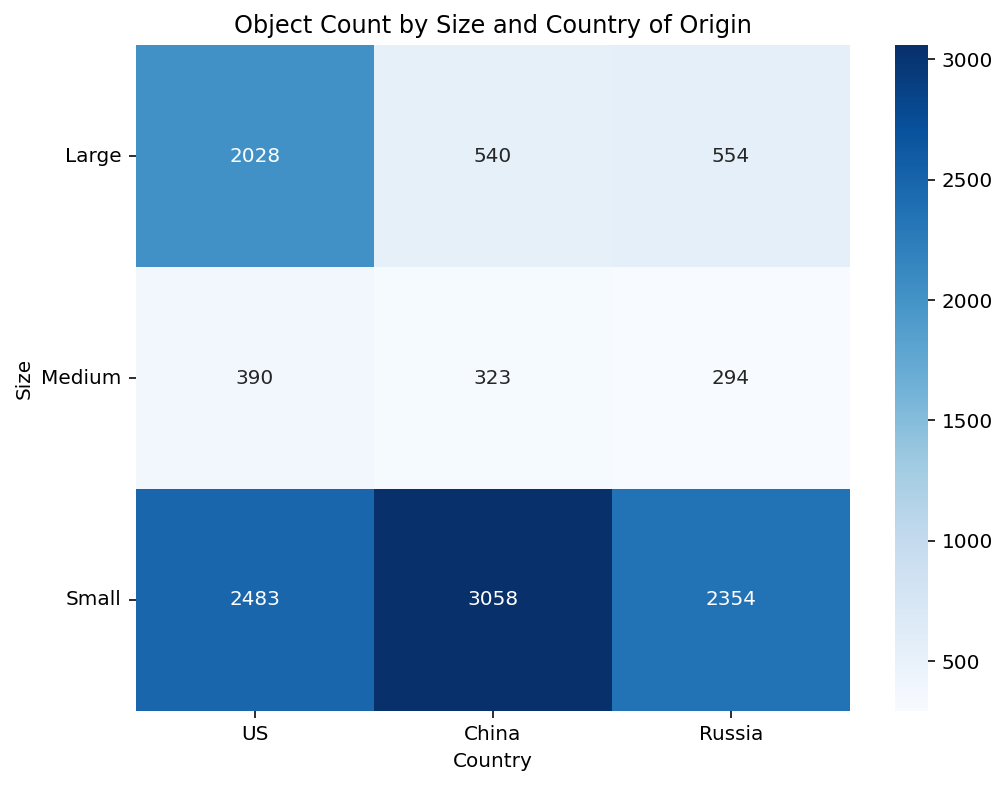

In [22]:
# Just look at top 3 contributors
top_codes = top_counts.keys()[:3]
TOP_MASK = (df['COUNTRY_CODE'].isin(top_codes))
top_df = df[TOP_MASK]
country_names = ["US",'China','Russia']

country_counts = top_df.pivot_table(values='AggValue', index='RCS_SIZE', columns='COUNTRY_CODE', aggfunc=np.sum)

# Specify order of rows and columns
country_counts = country_counts.reindex(index=sizes, columns=top_codes)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(country_counts, cmap="Blues", annot=True, fmt='g')
plt.ylabel('Size')
plt.xlabel('Country')
plt.title("Object Count by Size and Country of Origin")
plt.xticks(ticks=[0.5,1.5,2.5], labels=country_names)
plt.yticks(ticks=[0.5,1.5,2.5], labels=sizes,rotation=0)
plt.show()

### <u>How many of each class of object are there from the top 3 contributors?</u>

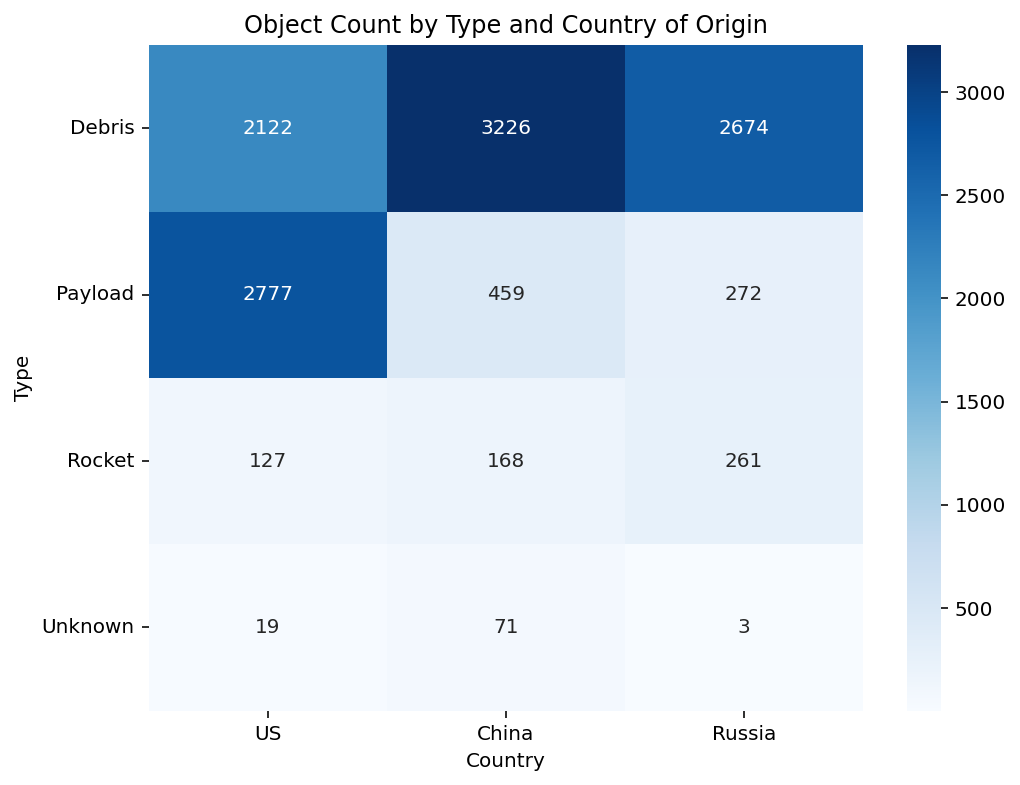

In [23]:
top_codes = top_counts.keys()[:3]
TOP_MASK = (df_filled['COUNTRY_CODE'].isin(top_codes))
top_df = df[TOP_MASK]

country_counts = top_df.pivot_table(values='AggValue', index='OBJECT_TYPE', columns='COUNTRY_CODE', aggfunc=np.sum)

# Specify order of rows and columns
obj_types = ['Debris', 'Payload', 'Rocket','Unknown']
country_counts = country_counts.reindex(index=obj_types, columns=top_codes)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(country_counts, cmap="Blues", annot=True, fmt='g')
plt.ylabel('Type')
plt.xlabel('Country')
plt.title("Object Count by Type and Country of Origin")
plt.xticks(ticks=[0.5,1.5,2.5], labels=country_names)
plt.yticks(ticks=[0.5,1.5,2.5,3.5], labels=obj_types, rotation=0)
plt.show()

###<u>How many objects' country of origin is unknown?</u>

In [24]:
NO_COUNTRY_MASK = ((df['COUNTRY_CODE'] == 'Unknown'))
no_country_df = df[NO_COUNTRY_MASK]
print(f"There are {len(no_country_df)} debris objects in this dataset with unknown country of origin.")

There are 158 debris objects in this dataset with unknown country of origin.


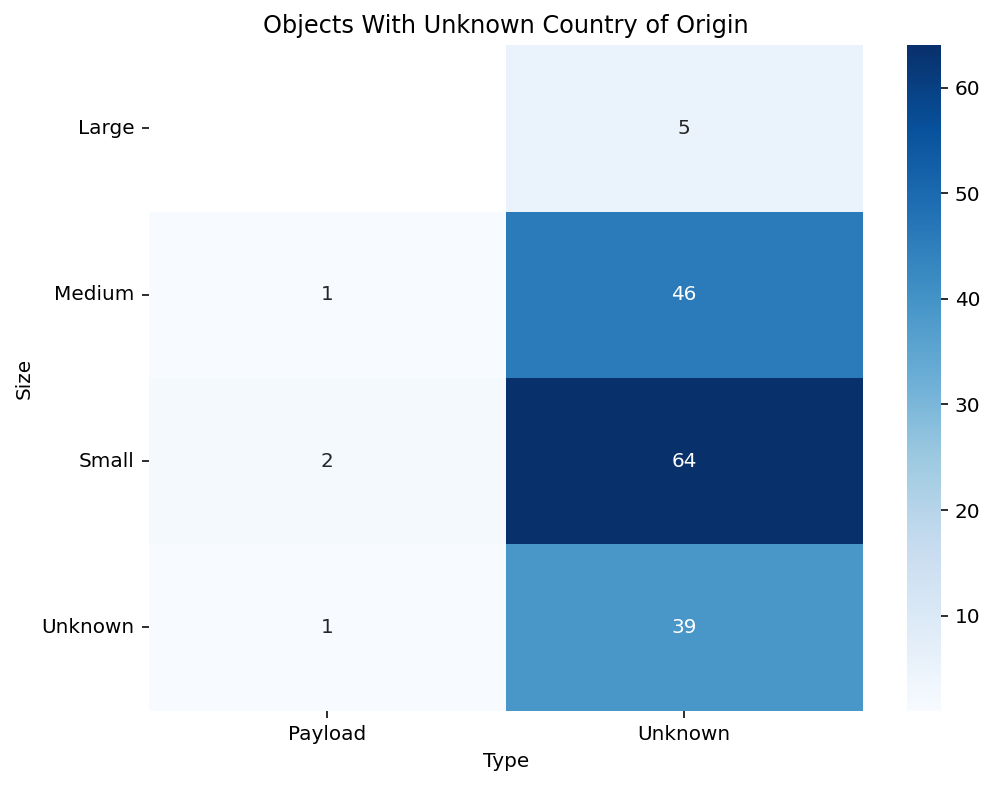

In [25]:
no_country_df.loc[:,'RCS_SIZE'] = no_country_df['RCS_SIZE'].fillna('Unknown')
no_country_class_counts = no_country_df.pivot_table(values='AggValue', index='RCS_SIZE', columns='OBJECT_TYPE', aggfunc=np.sum)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(no_country_class_counts, cmap="Blues", annot=True, fmt='g')
plt.ylabel('Size')
plt.xlabel('Type')
plt.title("Objects With Unknown Country of Origin")
plt.xticks(ticks=[0.5,1.5], labels=["Payload", 'Unknown'])
plt.yticks(ticks=[0.5,1.5,2.5,3.5], labels=["Large",'Medium','Small', 'Unknown'],rotation=0)
plt.show()

###<u>Dive into a few specific slices and analyze their orbits.</u>

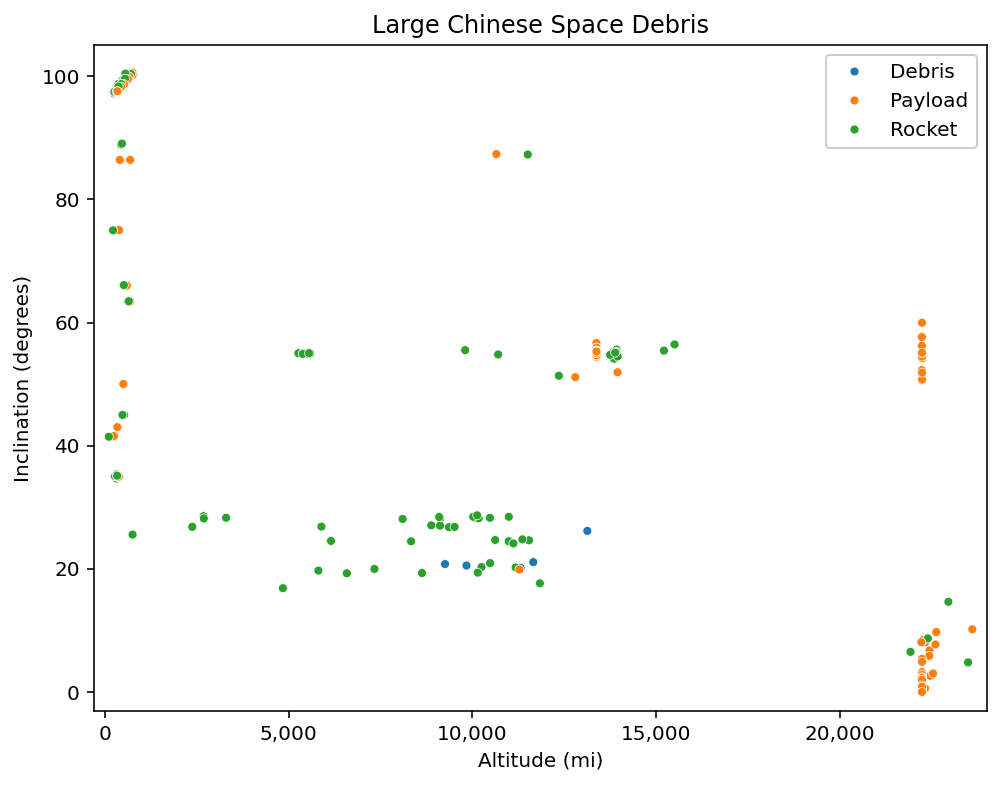

In [26]:
CHINESE_LARGE_MASK = ((df['COUNTRY_CODE'] == 'PRC') & (df['RCS_SIZE']=='Large') & (df['OBJECT_TYPE'] != 'Unknown'))
chinese_large_df = df[CHINESE_LARGE_MASK]

obj_type_2 = ['Debris','Payload','Rocket']

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=chinese_large_df['ALTITUDE_MI'], y=chinese_large_df['INCLINATION'],s=20,hue=chinese_large_df['OBJECT_TYPE'],hue_order=obj_type_2)
plt.xlabel('Altitude (mi)')
plt.ylabel('Inclination (degrees)')
plt.title('Large Chinese Space Debris')
plt.xlim((-300, 24000))
plt.ylim((-3,105))
plt.legend(framealpha=1)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

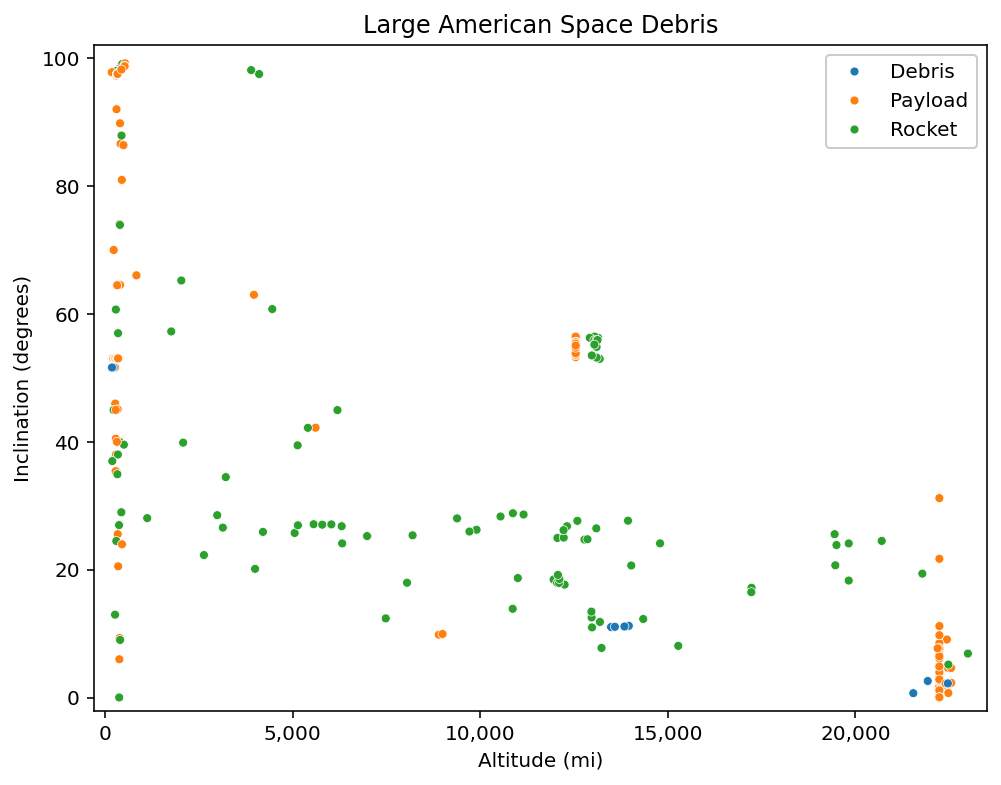

In [27]:
AMERICAN_LARGE_MASK = ((df['COUNTRY_CODE'] == 'US') & (df['RCS_SIZE'] == 'Large') & (df['OBJECT_TYPE'] != 'Unknown'))
american_large_df = df[AMERICAN_LARGE_MASK]

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=american_large_df['ALTITUDE_MI'], y=american_large_df['INCLINATION'],s=20,hue=american_large_df['OBJECT_TYPE'],hue_order=obj_type_2)
plt.xlabel('Altitude (mi)')
plt.ylabel('Inclination (degrees)')
plt.title('Large American Space Debris')
plt.xlim((-300, 23500))
plt.ylim((-2,102))
plt.legend(framealpha=1)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

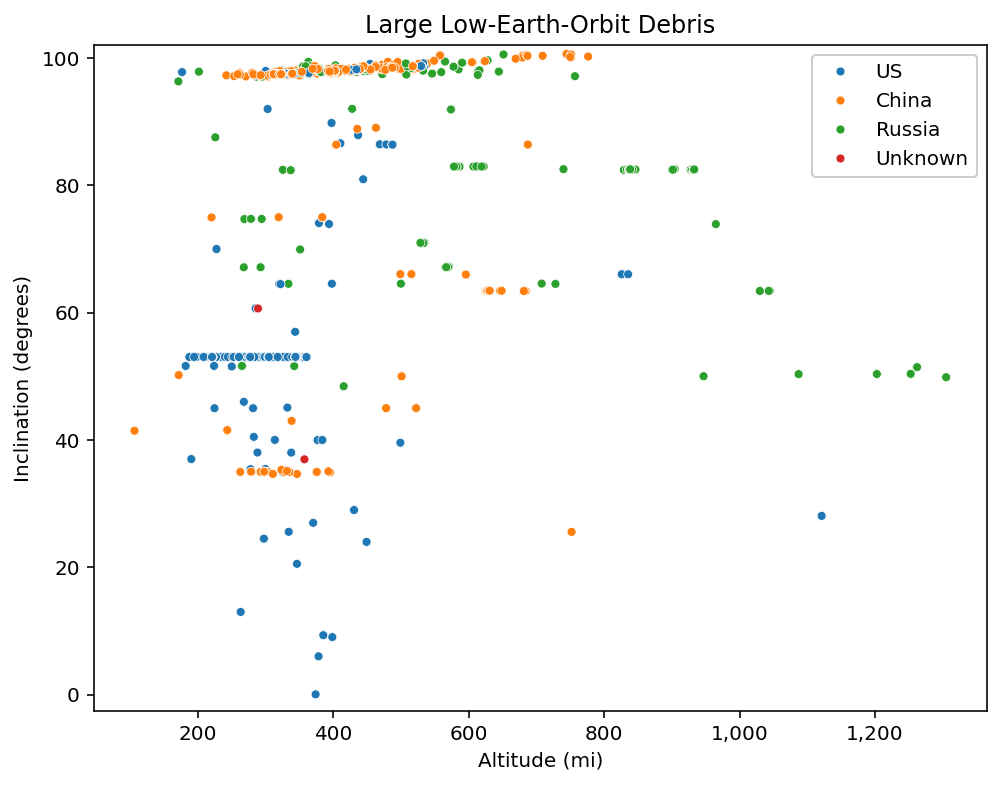

In [28]:
LEO_MASK = (df['PERIOD'] <= 130)
leo_df = df[LEO_MASK]

US_CN_RU_MASK = (leo_df['COUNTRY_CODE'].isin(['US','PRC','CIS','Unknown']))
leo_ucr_df = leo_df[US_CN_RU_MASK]

LG_MASK = (leo_ucr_df['RCS_SIZE'] == 'Large')
leo_ucr_lg_df = leo_ucr_df[LG_MASK]

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=leo_ucr_lg_df['ALTITUDE_MI'], y=leo_ucr_lg_df['INCLINATION'],s=20, hue=leo_ucr_lg_df['COUNTRY_CODE'], hue_order=['US','PRC','CIS','Unknown'])
plt.xlabel('Altitude (mi)')
plt.ylabel('Inclination (degrees)')
plt.title('Large Low-Earth-Orbit Debris')
# plt.xlim((-0.02,0.88))
plt.ylim((-2.5,102))
# https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text
handles, previous_labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['US','China','Russia','Unknown'],framealpha=1)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

#<b>Remaining Work</b>

##<u>Questions</u>
* What are the potential impacts of space debris on future space missions? (CRITICAL)
* How many incidents of debris-related damage to operational satellites have been recorded? (CRITICAL)
* What is the largest recorded piece of space debris by mass or size?
* What are the most common materials or components that make up the space debris?
* How many space debris objects are tracked vs untracked?
* What mitigation measures have been taken to reduce space debris?

##<u>Recommendations</u>
* Invest in R&D for more robust space debris tracking.
* Develop space debris removal solutions.
* Adopt sustainable satellite design practices.
* Develop insurance/liability frameworks regarding damage from space debris.
* Raise public awareness about space debris.
* Develop space traffic management systems.

##<u>Inferential questions</u>
* What is the current level of danger operational satellites are in due to space debris?
* How effective are current tracking systems in monitoring space debris?
* How effective have the taken mitigation measures been in reducing space debris?
* Examine long-term impact and sustainability of projected space activities.